In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#Sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# To download dataset
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("rezaunderfit/instagram-fake-and-real-accounts-dataset")

# print("Path to dataset files:", path)

In [10]:
df= pd.read_csv(r"D:\Projects\instagram_pa\datasets\d1\final-v1.csv")
df.head()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url,is_fake
0,0.001,0.257,13,1,1,13,0,0,0,0,0,0,1
1,0.000,0.958,9,1,0,0,0,1,0,0,0,0,1
2,0.000,0.253,12,0,0,0,0,0,0,0,0,0,1
3,0.000,0.977,10,1,0,0,0,0,0,0,0,0,1
4,0.000,0.321,11,0,0,11,1,0,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edge_followed_by      785 non-null    float64
 1   edge_follow           785 non-null    float64
 2   username_length       785 non-null    int64  
 3   username_has_number   785 non-null    int64  
 4   full_name_has_number  785 non-null    int64  
 5   full_name_length      785 non-null    int64  
 6   is_private            785 non-null    int64  
 7   is_joined_recently    785 non-null    int64  
 8   has_channel           785 non-null    int64  
 9   is_business_account   785 non-null    int64  
 10  has_guides            785 non-null    int64  
 11  has_external_url      785 non-null    int64  
 12  is_fake               785 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 79.9 KB


In [4]:
#check for null values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing (%)': percent_missing})
missing_value_df.sort_values('percent_missing (%)', ascending=False)

,percent_missing (%)
edge_followed_by,0.0
edge_follow,0.0
username_length,0.0
username_has_number,0.0
full_name_has_number,0.0
full_name_length,0.0
is_private,0.0
is_joined_recently,0.0
has_channel,0.0
is_business_account,0.0


In [5]:
df.describe()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url,is_fake
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.0,785.000000,785.000000,785.000000,785.000000
mean,0.002223,0.401606,11.630573,0.644586,0.109554,6.129936,0.184713,0.361783,0.0,0.073885,0.001274,0.062420,0.881529
std,0.036105,0.293845,3.284329,0.478944,0.312532,6.943903,0.388312,0.480823,0.0,0.261751,0.035692,0.242072,0.323371
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.135000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.336000,11.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.623000,13.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,26.000000,1.000000,1.000000,30.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

edge_followed_by        0
edge_follow             0
username_length         0
username_has_number     0
full_name_has_number    0
full_name_length        0
is_private              0
is_joined_recently      0
has_channel             0
is_business_account     0
has_guides              0
has_external_url        0
is_fake                 0
dtype: int64

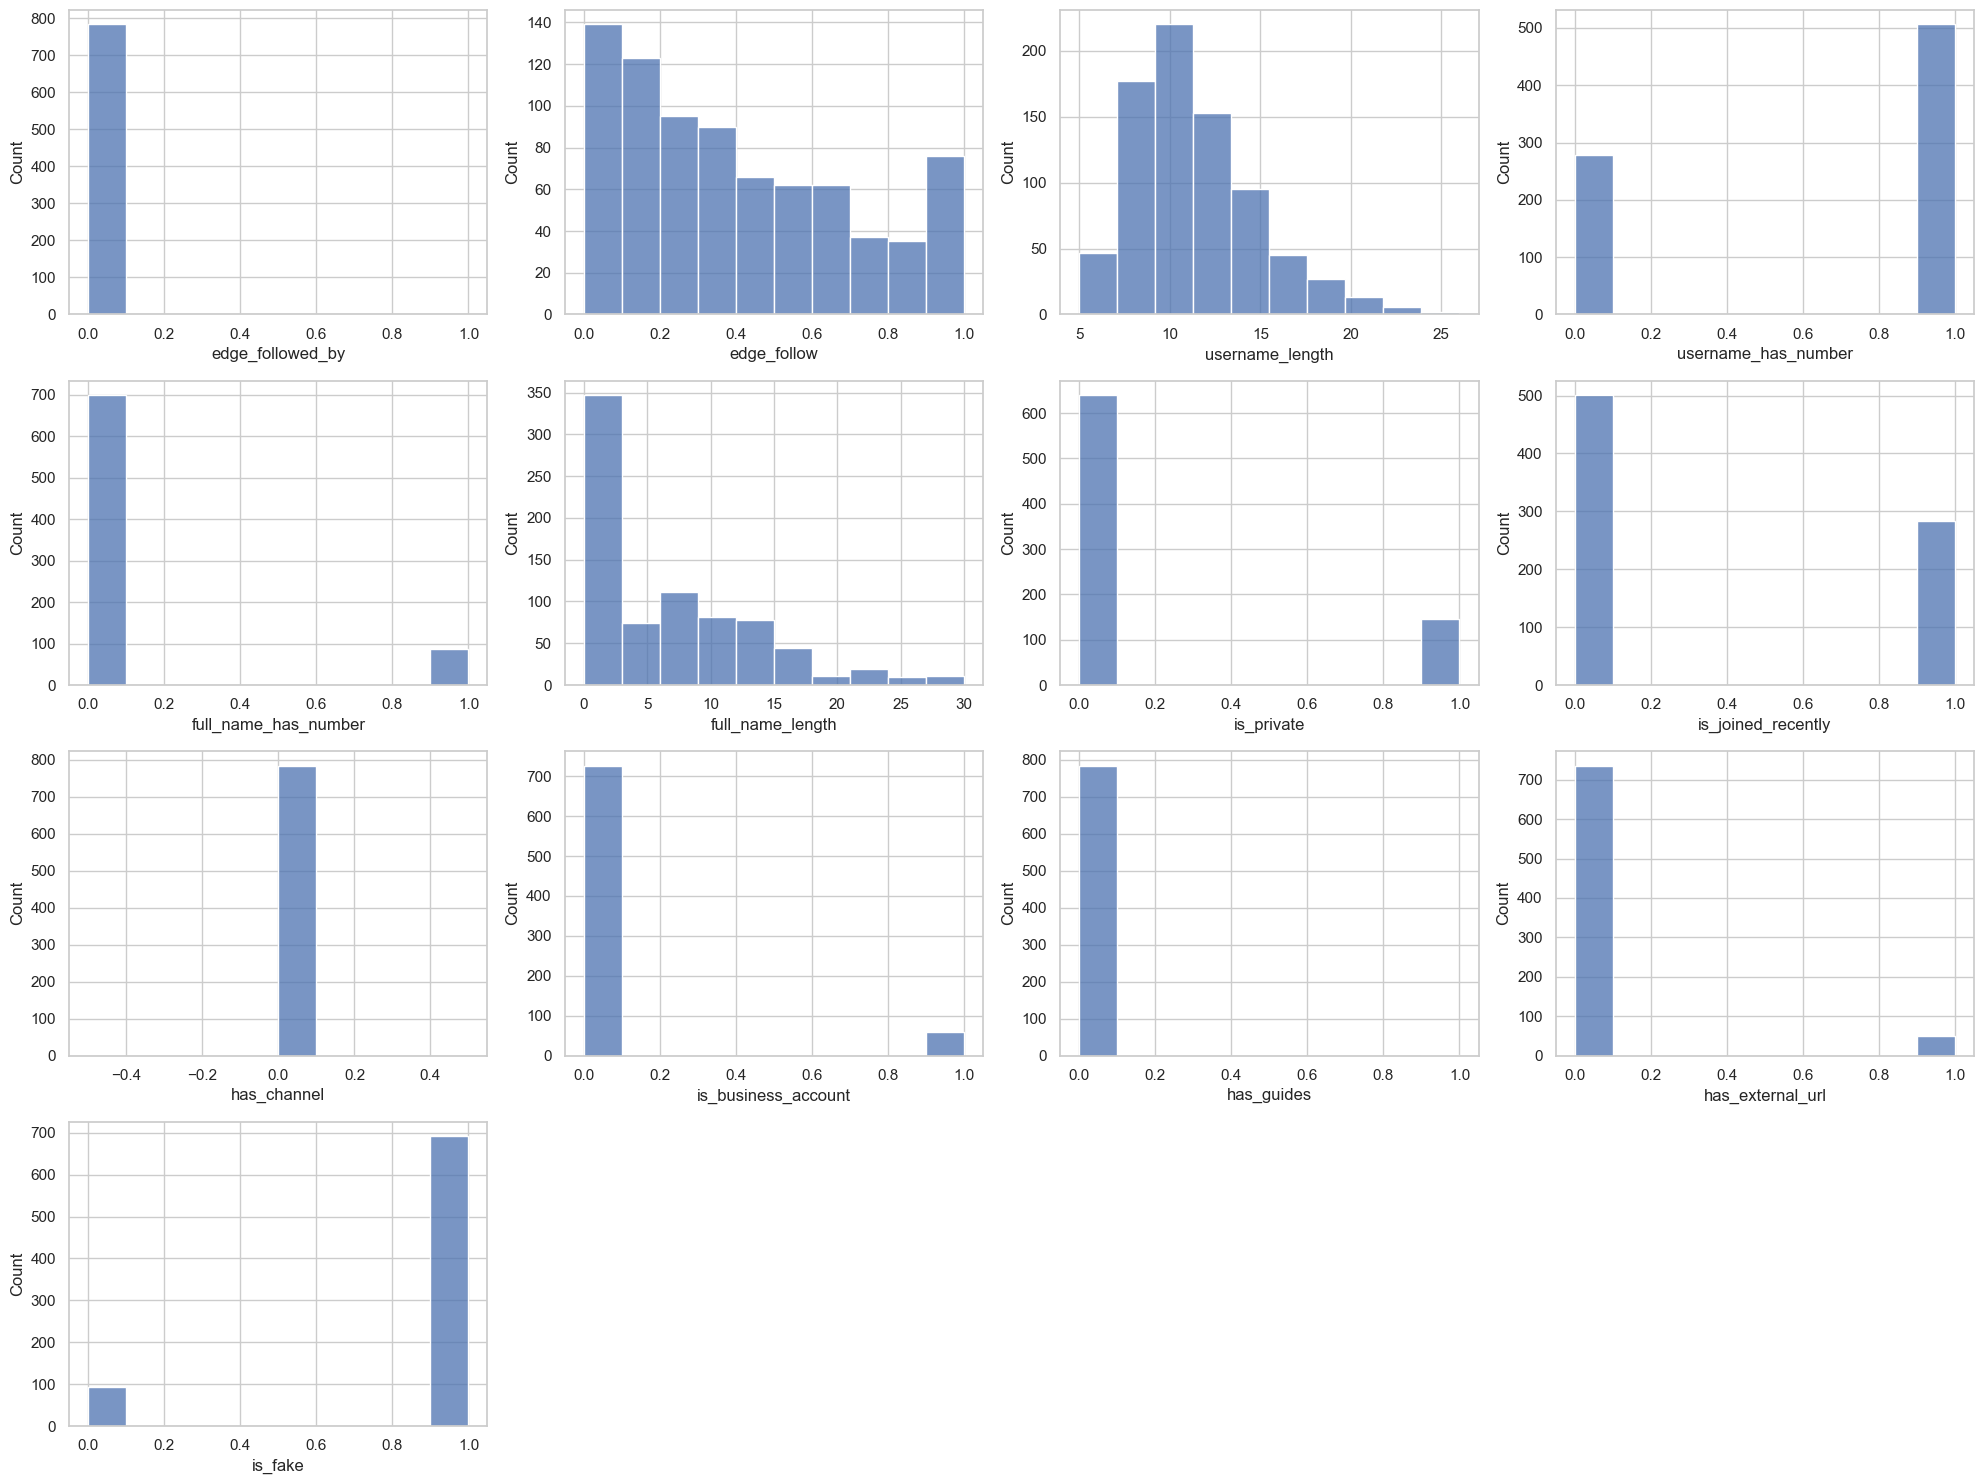

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np  # Import numpy for NaN

# Set the style of seaborn plot
sns.set(style="whitegrid")

column_names = df.columns
# List of features
features = list(column_names)

# Plot histograms for each feature with NaN handling
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    df_clean = df[feature].replace([np.inf, -np.inf], np.nan)  # Replace inf and -inf with NaN
    plt.subplot(4, 4, i + 1)
    sns.histplot(df_clean, kde=False, bins=10)

plt.tight_layout()
plt.show()

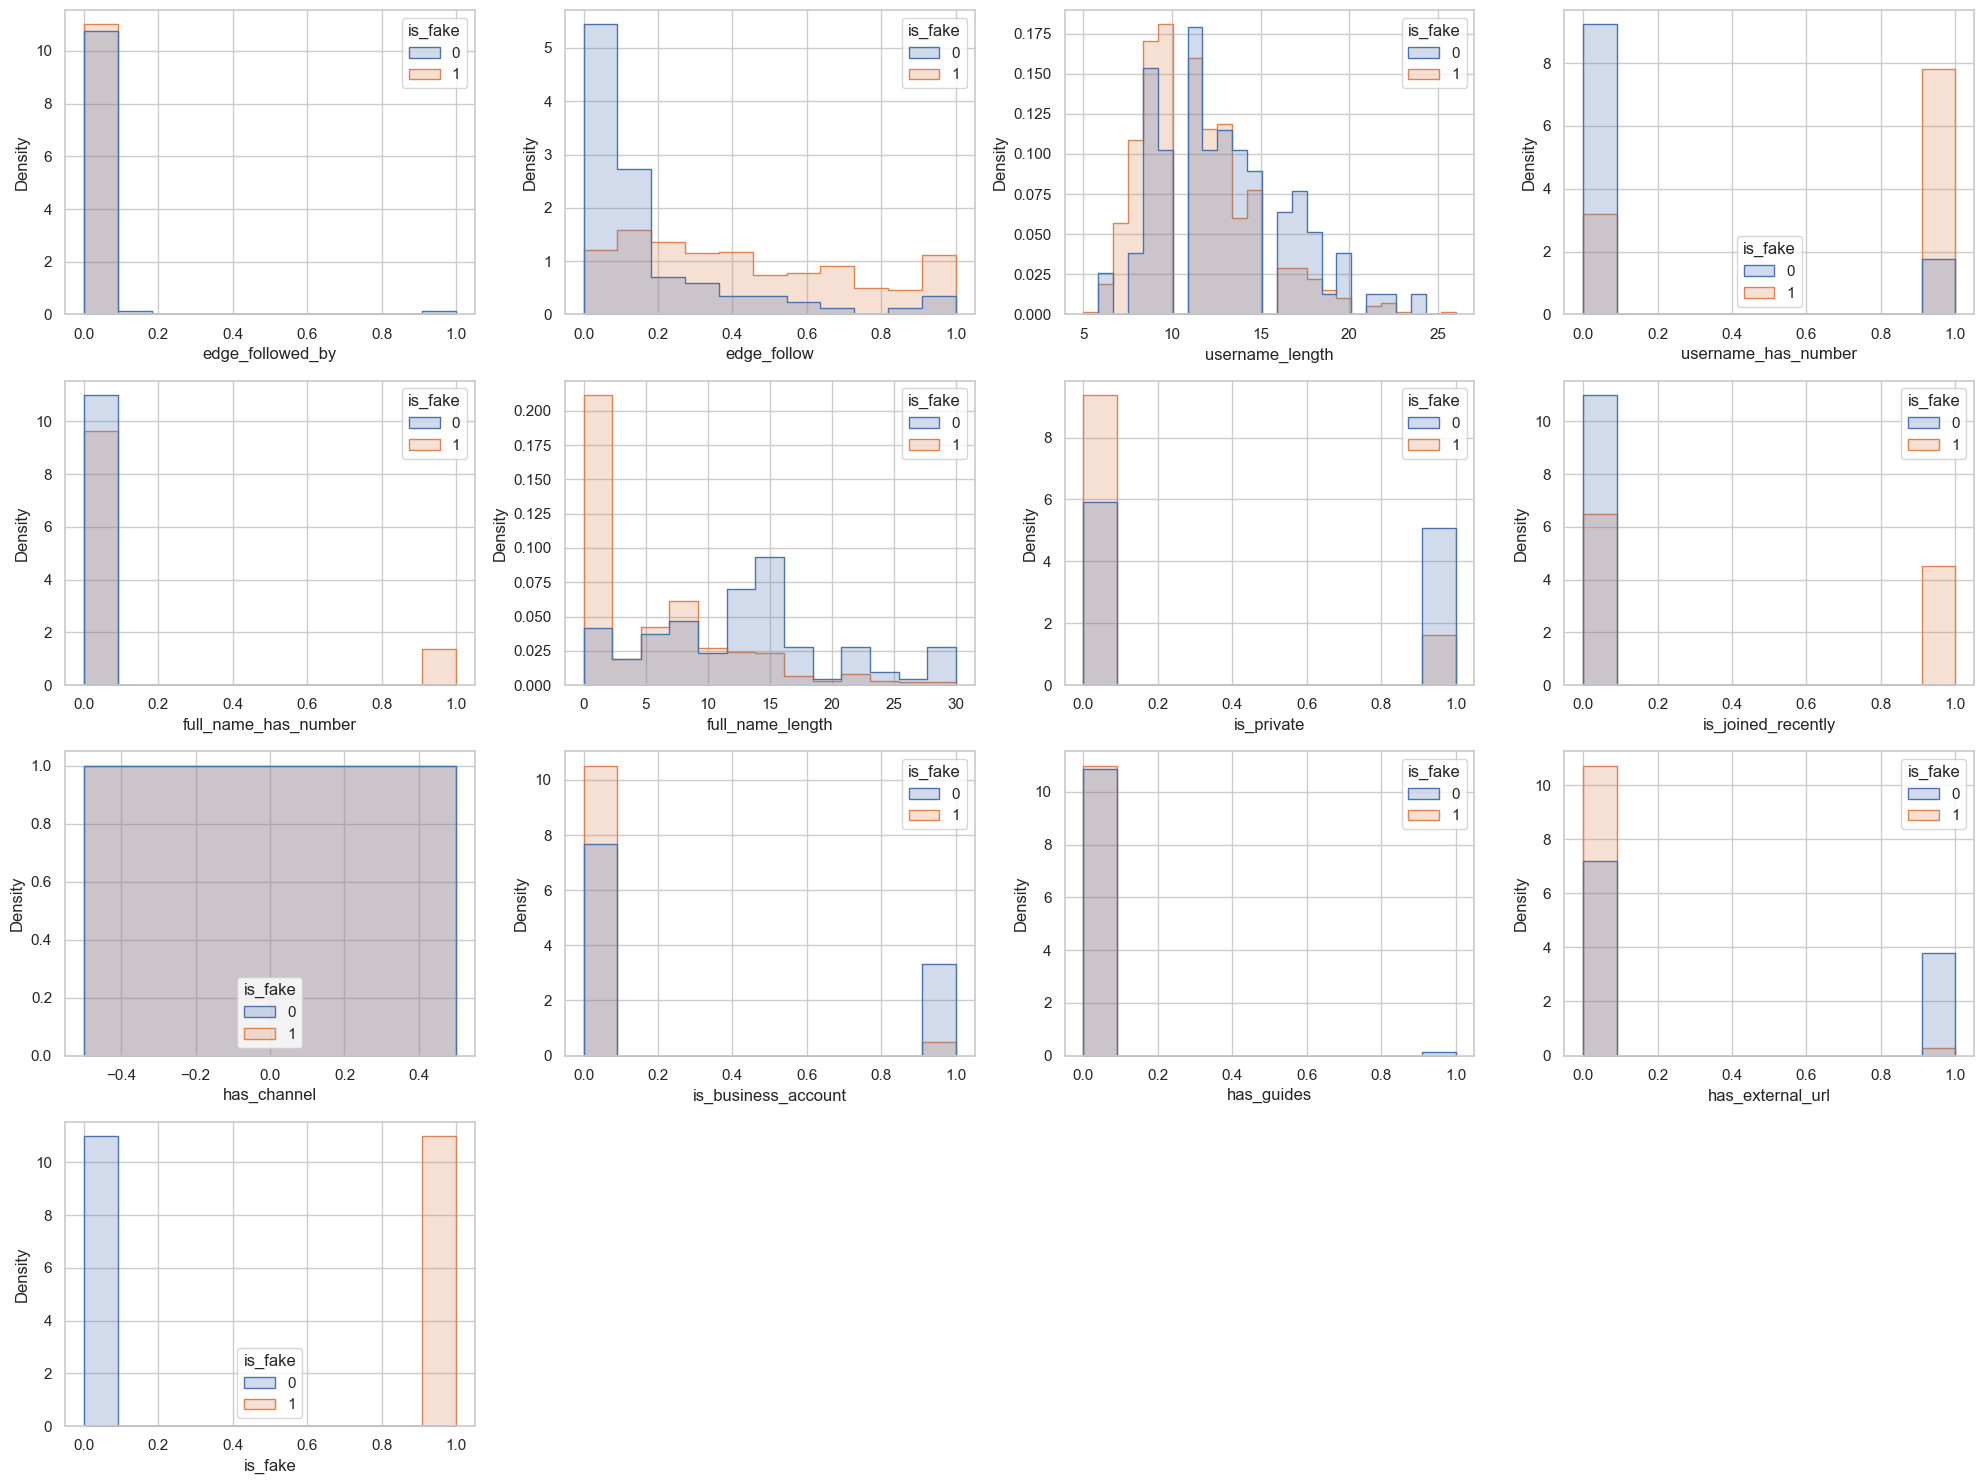

In [8]:
# Plot the distribution of each feature with respect to the target variable 'fake'
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.histplot(data=df, x=feature, hue='is_fake', element="step", stat="density", common_norm=False)
plt.tight_layout()
plt.show()

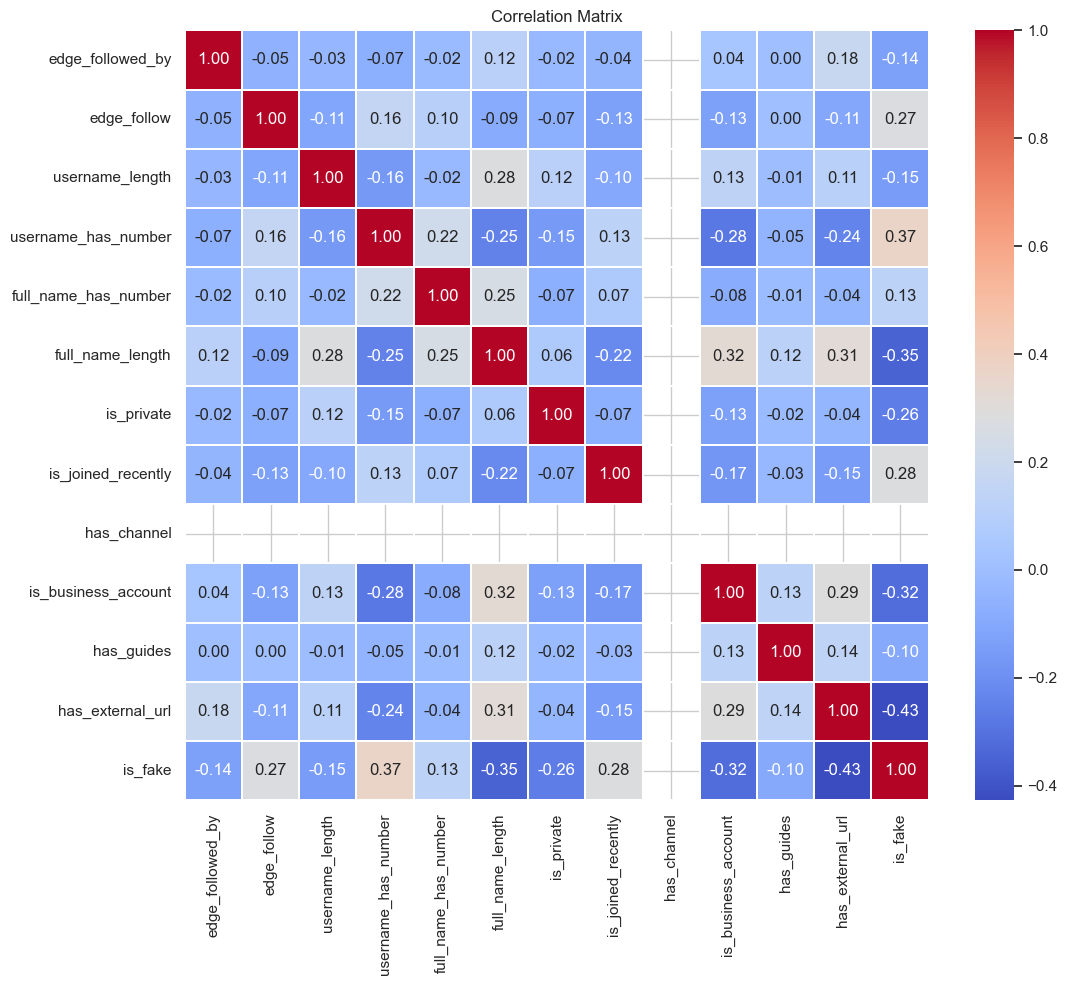

In [9]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.1)
plt.title("Correlation Matrix")
plt.show()